In [52]:
import pandas as pd
import matplotlib.pyplot as plt

k = int(input("Enter the number of rows to return from transactions:"))
def exercise_0(file):
    data = pd.read_csv(file)
    return data
def exercise_1(data):
    column_names = list(data.columns)
    return column_names 
def exercise_2(data,k):
    return data.head(k)
def exercise_3(data,k):
    return data.sample(n=k)
def exercise_4(data):
    unique_types = list(data['type'].unique())
    return unique_types
def exercise_5(data,n):
    top10_transactions = data['nameDest'].value_counts().head(n)
    return top10_transactions
def exercise_6(data):
    fraud_detected = data[data['isFraud']==1]
    return fraud_detected
def exercise_7(data):
    distinct_destinations = data.groupby('nameOrig')['nameDest'].nunique()
    distinct_destinations_df = pd.DataFrame(distinct_destinations).sort_values(by='nameDest',ascending=False)
    distinct_destinations_df.columns = ['Number of Distinct Destinations']
    return distinct_destinations_df

def exercise_custom1(data):
    plt.figure(figsize=(10, 5))
    data['type'].value_counts().plot(kind='bar')
    plt.title('Transaction Types')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.show()

    # Transaction types split by fraud bar chart
    plt.figure(figsize=(10, 5))
    fraud_counts = data[data['isFraud'] == 1]['type'].value_counts()
    non_fraud_counts = data[data['isFraud'] == 0]['type'].value_counts()
    fraud_counts.plot(kind='bar', color='red', label='Fraud')
    non_fraud_counts.plot(kind='bar', color='blue', label='Non-Fraud', alpha=0.5)
    plt.title('Transaction Types Split by Fraud')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

    # Short description
    description = "The first chart shows the distribution of transaction types, while the second chart compares transaction types split by fraud and non-fraudulent transactions."
    return description

def exercise_custom2(data):
    cash_out_transactions = data[data['type'] == 'CASH_OUT']

    # Scatter plot
    plt.figure(figsize=(10, 5))
    plt.scatter(cash_out_transactions['oldbalanceOrg'] - cash_out_transactions['newbalanceOrig'],
                cash_out_transactions['oldbalanceDest'] - cash_out_transactions['newbalanceDest'],
                color='orange', alpha=0.5)
    plt.title('Origin Account Balance Delta vs. Destination Account Balance Delta (Cash Out Transactions)')
    plt.xlabel('Origin Account Balance Delta')
    plt.ylabel('Destination Account Balance Delta')
    plt.show()

    # Short description
    description = "This scatter plot illustrates the relationship between the origin account balance delta and the destination account balance delta for Cash Out transactions."
    return description



transactions_df = exercise_0("C:/Users/91939/OneDrive/Desktop/JPMorgan/transactions.csv")
print(transactions_df.head(1))


   step     type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  PAYMENT  9839.64  C1231006815       170136.0       160296.36   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  


In [4]:
column_names = exercise_1(transactions_df)
print(column_names)

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [9]:
return_krows = exercise_2(transactions_df,k)
print(return_krows)

   step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT  9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT  1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER   181.00  C1305486145          181.0            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  


In [12]:
return_krandomrows = exercise_3(transactions_df,k)
print(return_krandomrows)

        step      type      amount     nameOrig  oldbalanceOrg  \
46165      9  CASH_OUT    22118.52    C42744445           0.00   
35282      9  TRANSFER  1264125.34  C1669770606           0.00   
114384    11   CASH_IN   129792.19   C813371759     6426598.31   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
46165              0.0  C2008394397       118905.71       141024.23        0   
35282              0.0  C1761353343      4817482.42      5938259.19        0   
114384       6556390.5   C709906087      1765421.41      1202719.55        0   

        isFlaggedFraud  
46165                0  
35282                0  
114384               0  


In [19]:
unique_types = exercise_4(transactions_df)
print(unique_types)

['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']


In [24]:
top10_transactions = exercise_5(transactions_df,10)
print(top10_transactions)

nameDest
C985934102     84
C1286084959    80
C248609774     75
C1590550415    74
C2083562754    74
C665576141     72
C977993101     70
C1360767589    69
C451111351     66
C97730845      64
Name: count, dtype: int64


In [26]:
fraud_detected = exercise_6(transactions_df)
print(fraud_detected)

        step      type      amount     nameOrig  oldbalanceOrg  \
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
251        1  TRANSFER     2806.00  C1420196421        2806.00   
252        1  CASH_OUT     2806.00  C2101527076        2806.00   
680        1  TRANSFER    20128.00   C137533655       20128.00   
...      ...       ...         ...          ...            ...   
182862    13  CASH_OUT      408.00  C1894004688         408.00   
193765    13  TRANSFER    48375.02   C920803432       48375.02   
193766    13  CASH_OUT    48375.02  C1894578299       48375.02   
196775    13  TRANSFER  4022667.54   C735463888     4022667.54   
196776    13  CASH_OUT  4022667.54    C79951219     4022667.54   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2                  0.0   C553264065            0.00            0.00        1   
3                  0.0    C38997010        2118

In [34]:
distinct_destinations_df = exercise_7(transactions_df)
print(distinct_destinations_df)

             Number of Distinct Destinations
nameOrig                                    
C745009740                                 2
C260230637                                 2
C44568807                                  2
C1709295811                                2
C361604284                                 1
...                                      ...
C1648185402                                1
C1648194899                                1
C1648216508                                1
C1648222711                                1
C999983894                                 1

[199996 rows x 1 columns]


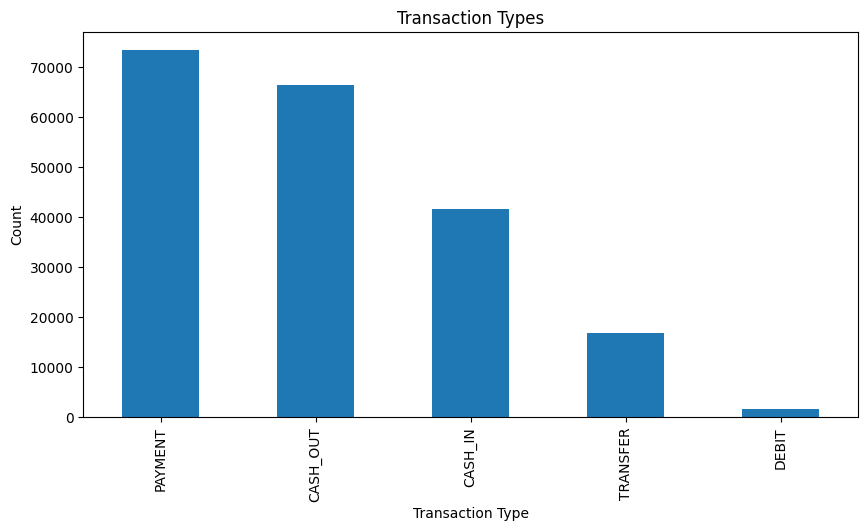

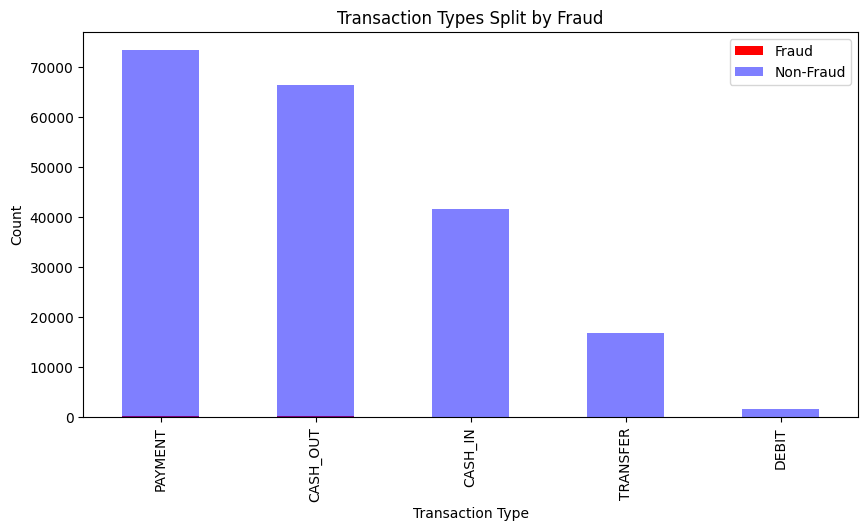

The first chart shows the distribution of transaction types, while the second chart compares transaction types split by fraud and non-fraudulent transactions.


In [49]:
transactions_type_description = exercise_custom1(transactions_df)
print(transactions_type_description)

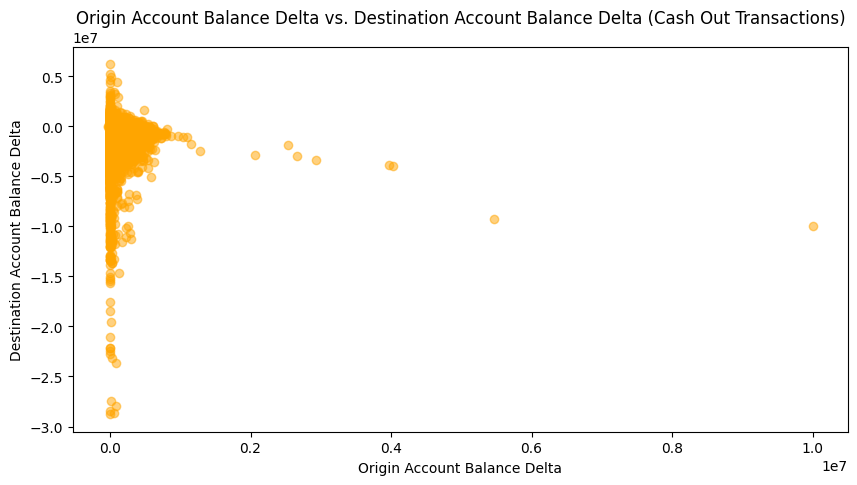

This scatter plot illustrates the relationship between the origin account balance delta and the destination account balance delta for Cash Out transactions.


In [51]:
balance_description = exercise_custom2(transactions_df)
print(balance_description)